<a href="https://colab.research.google.com/github/seungmei/QNS/blob/main/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%EC%9C%BC%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EC%96%91%EC%9E%90%EC%BB%B4%ED%93%A8%ED%8C%85_6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha2

In [2]:
import qiskit
import numpy as np
qiskit.version.get_version_info()

'2.0.1'

# 6. 양자 소인수 분해 알고리즘
- 양자 연산: 양자 위상 추정(Quantum Phase Estimation, QPE)을 활용한 모듈러 지수 함수의 주기 찾기
- 고전 연산: 양자 연산을 통해 찾은 주기를 사용하여 정수의 소인수 찾기

## 6.1 사이먼 알고리즘

### 6.1.1 사이먼 함수

### 6.1.2 사이먼 알고리즘을 구현하는 양자 회로

### 6.1.3 사이먼 오라클 회로의 구현

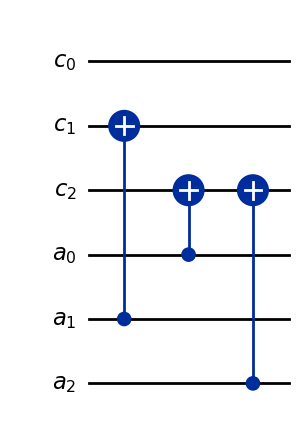

In [3]:
from qiskit import QuantumCircuit, QuantumRegister
# 3-qubit simon oracle with b = 101 을 정의하는 함수
def simon_oracle3(rc, ra):
    qc = QuantumCircuit(rc, ra)
    qc.cx(ra[1],rc[1])
    qc.cx(ra[0],rc[2])
    qc.cx(ra[2],rc[2])
    return qc

# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 3
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
qc = QuantumCircuit(rc, ra)

# n=3 인 사이먼 오라클 회로를 양자 회로로 구현
oracle = simon_oracle3(rc, ra)
oracle.draw(output='mpl')

### 6.1.4 사이먼 회로의 구현

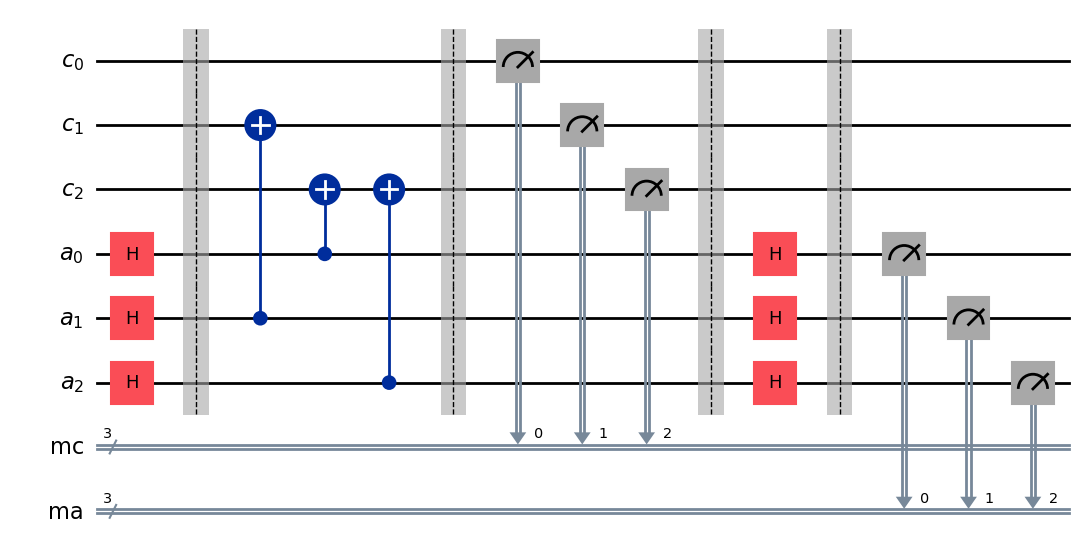

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# 사이먼 회로의 구현
n = 3
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rma = ClassicalRegister(n,'ma')
rmc = ClassicalRegister(n,'mc')
qc = QuantumCircuit(rc, ra, rmc, rma)

qc.h(ra)
qc.barrier()
qc.compose(simon_oracle3(rc,ra),range(2*n),inplace=True)
qc.barrier()
qc.measure(rc,rmc)
qc.barrier()
qc.h(ra)
qc.barrier()
qc.measure(ra,rma)
qc.draw(output='mpl',fold=-1)

In [5]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=n+20)
result = job.result()
count = result[0].data.ma.get_counts()
print(count)

{'010': 7, '101': 6, '000': 6, '111': 4}


b=[1, 1, 0, 1, 1]


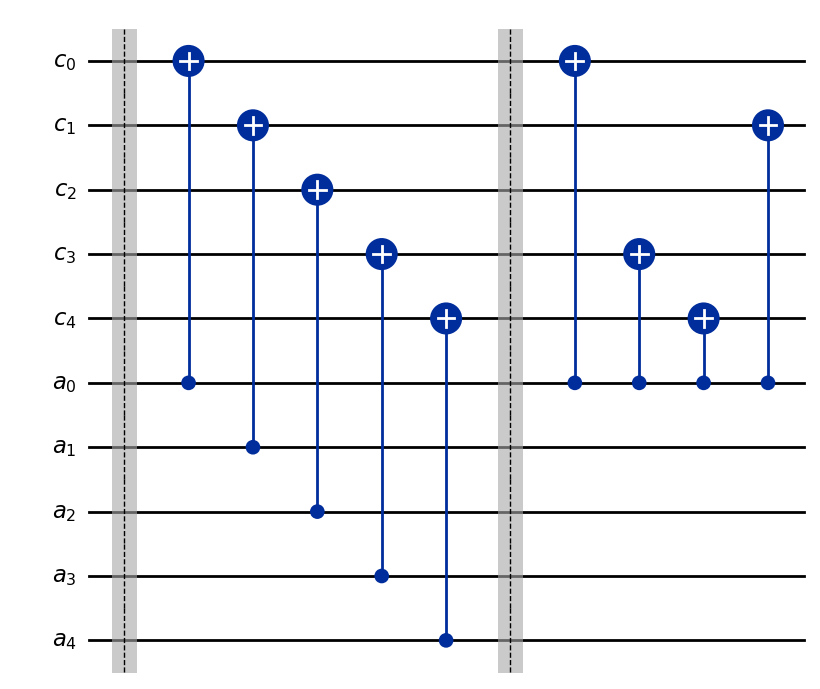

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# n-큐비트 사이먼 오라클 함수를 구현하는 회로와 random b 를 반환하는 회로
def simon_oracle(rc, ra, n):
    qc = QuantumCircuit(rc, ra)
    np.random.seed()
    k = np.random.randint(1,n+1)
    b1 = np.random.permutation(n)[:k]
    b = []
    for i in range(n):
        if i in b1: b += [1]
        else :      b += [0] # 임의의 non-zero b 를 생성

    qc.barrier()
    for i in range(n): # c[i] ^= a[i]
        qc.cx(ra[i],rc[i])
    qc.barrier()
    for bi in b1:      # c^f(x^b) 를 c^f(x) 와 같게 만듦
        qc.cx(ra[n-1-b1[0]],rc[n-1-bi])

    return qc,b

# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 5
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rm = ClassicalRegister(n,'m')
qc = QuantumCircuit(rc, ra, rm)

# 사이먼 오라클 회로를 양자 회로로 구현
oracle, b = simon_oracle(rc,ra,n)
print(f"b={b}")
oracle.draw(output='mpl', fold=-1)

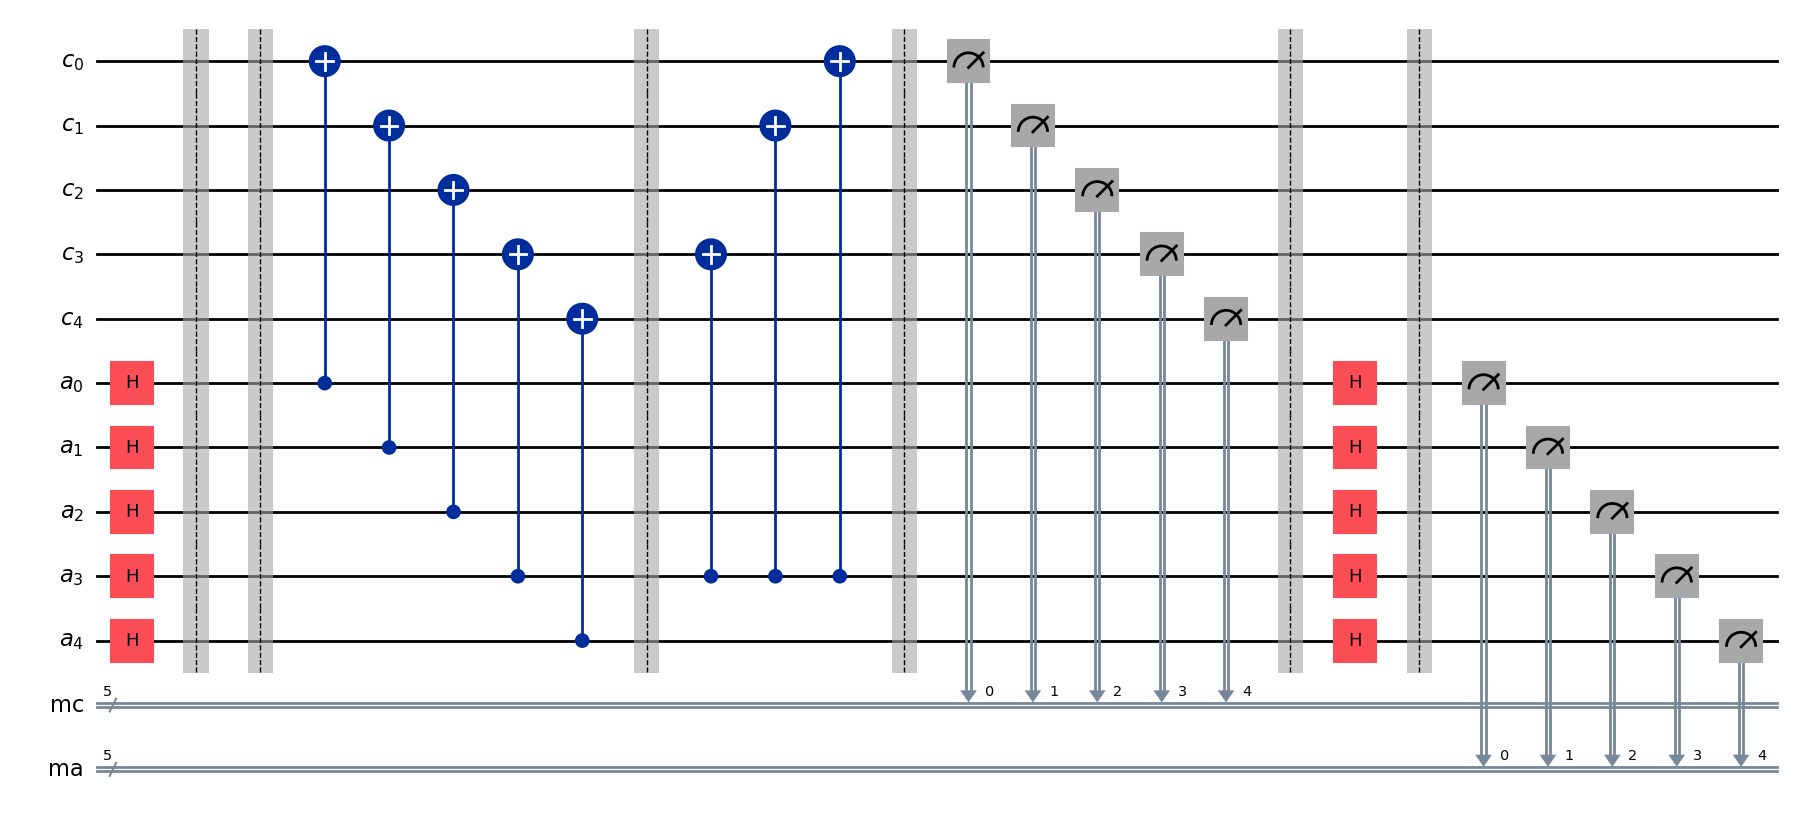

In [7]:
# 사이먼 회로의 구현
n = 5
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rma = ClassicalRegister(n,'ma')
rmc = ClassicalRegister(n,'mc')
qc = QuantumCircuit(rc, ra, rmc, rma)

qc.h(ra)
qc.barrier()
oracle, b = simon_oracle(rc,ra,n)
qc.compose(oracle,range(2*n),inplace=True)
qc.barrier()
qc.measure(rc,rmc)
qc.barrier()
qc.h(ra)
qc.barrier()
qc.measure(ra,rma)
qc.draw(output='mpl',fold=-1)

In [8]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=n+20)
result = job.result()
count = result[0].data.ma.get_counts()
print(count)

{'10100': 2, '01101': 1, '00100': 3, '11001': 2, '01001': 1, '10000': 3, '10111': 2, '11010': 2, '00000': 3, '10011': 1, '01010': 2, '00011': 2, '11101': 1}


### 6.1.5 측정값으로부터 사이먼 주기를 찾는 알고리즘

In [9]:
import numpy as np                                      #type: ignore
def rank_mod2(matrix):
    rows, cols = matrix.shape
    rank = 0
    for c in range(cols):
        # find the pivot row in column c
        for r in range(rank, rows):
            if matrix[r,c] != 0:
                # swap rows if needed
                if r != rank:
                    matrix[[rank,r]] = matrix[[r,rank]]

                # eliminate column below
                for k in range(rank+1, rows):
                    if matrix[k,c] == 1:
                        matrix[k] ^= matrix[rank]
                rank += 1
                break
    return rank

def indep(sys,e):
    sys.append(e)
    matrix = np.array(sys)
    n = len(sys)
    if rank_mod2(matrix) == n:
        return True
    else:
        sys.pop()
        return False

#  Gaussian Elimination in modulo-2
def ge_mod2(A):
    n = len(A)+1
    matrix = np.matrix(A)
    # Gaussian elimination
    for i in range(n-1):
        # Find the pivot row
        pivot = i
        while pivot < (n-1) and matrix[pivot,i] == 0:
            pivot += 1
        if pivot < (n-1):
            matrix[[i,pivot]] = matrix[[pivot,i]] # swap rows
            # Eliminate rows below
            for j in range(i + 1, n-1):
                if matrix[j, i] == 1:
                    matrix[j] ^= matrix[i]  # Row operation with XOR
    return matrix

#  Back Substitution in modulo-2
def back_substitution_mod2(matrix):
    # Back substitution to get a NON TRIVIAL solution
    _, n = matrix.shape
    x = -2*np.ones(n, dtype=int) # x[i] == -1 means x[i] is unknown yet
    x[-2] = x[-1] = -1                    # last row : 0....0011
    if matrix[n-2,-1] == 0 : x[-2] = 0    # last row : 0....0010
    elif matrix[n-2,-2] == 0 : x[-1] = 0  # last row : 0....0001
    for r in range(n-3, -1, -1):
        if matrix[:,r].sum() == 0 :
            x[r] = 1
        value = 0
        for c in range(r,n):
            if matrix[r,c] == 1 :
                if x[c] < 0 : break
        unknown = 0
        for j in range(c + 1, n):
            if matrix[r,j] == 1:
                if x[j] == -2: x[j] = -1
                if x[j] == -1:  unknown = 1 - unknown
                else :          value ^=  x[j]  # XOR to solve mod-2 equations
        if unknown == 1 : x[c] = -1
        else :
            if x[c] == -1:
                for j in range(r+1, n):
                    if x[j] == -1: x[j] = value
            x[c] = value
    # determine the unknown
    x1 = x.copy()
    for i in range(n):
        if x[i] == -1 : x1[i] = 1
    for r in range(n-1):
        v = 0
        for c in range(n):
            v ^= matrix[r,c] & x1[c]
        if v == 1 :
            for i in range(n):
                if x[i] == -1 : x[i] = 0
            return x
    return x1


def solve_simon(measured):
    sys_eq = []
    for z in measured.keys():
        n = len(z)
        if int(z) == 0 : continue  # skip all 0's
        eq = [int(zi) for zi in z] # binary string -> int list
        if len(sys_eq) == 0:
            sys_eq.append(eq)
            continue
        if (indep(sys_eq, eq)):
            if (len(sys_eq) == (n-1)):
                break
    print("The following z's are measured : ")
    print(np.array(sys_eq))
    matrix = ge_mod2(sys_eq)
    print("REF matrix:")
    print(matrix)
    b = back_substitution_mod2(matrix)
    return b

print("measured output : ", count)
b_simon = solve_simon(count)
print(f"The period of a function f(x)) with Simon Property is {b_simon}")

measured output :  {'10100': 2, '01101': 1, '00100': 3, '11001': 2, '01001': 1, '10000': 3, '10111': 2, '11010': 2, '00000': 3, '10011': 1, '01010': 2, '00011': 2, '11101': 1}
The following z's are measured : 
[[1 0 1 0 0]
 [0 1 1 0 1]
 [0 0 1 0 0]
 [1 0 1 1 1]]
REF matrix:
[[1 0 1 0 0]
 [0 1 1 0 1]
 [0 0 1 0 0]
 [0 0 0 1 1]]
The period of a function f(x)) with Simon Property is [0 1 0 1 1]


## 6.2 양자 푸리에 변환 Quantum Fourier Transform
- 양자 컴퓨팅 분야에서 주기를 찾거나 위상을 추정하는 데 사용

### 6.2.1. 양자 푸리에 변환의 정의
- 양자상태는 **기저 상태들의 선형 결합**으로 표현
  |psi> =sigma x=0 to N-1 (psi(x))|x>
- QFT는 계산기저 |x>를 서로 다른 기저 상태들의 중첩 상태로 변환

### 6.2.2 양자 푸리에 변환 회로

### 6.2.3 3-큐비트 양자 푸리에 변환 회로의 구현 예

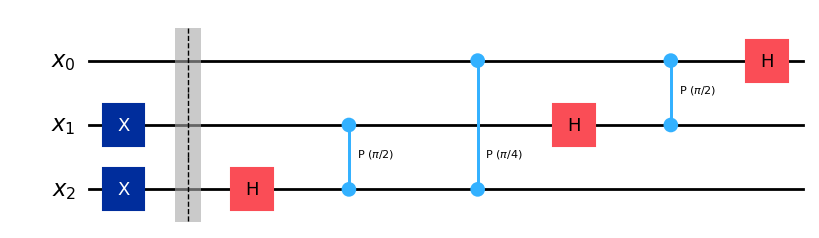

In [14]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)

qc.draw(output='mpl')

In [15]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'111': 134, '011': 125, '101': 145, '110': 122, '100': 128, '001': 123, '000': 111, '010': 112}


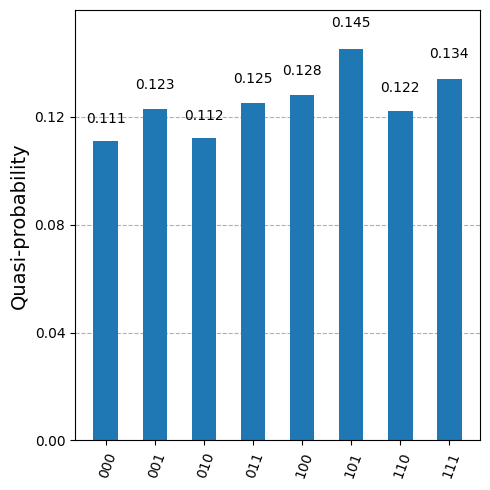

In [16]:
from qiskit.visualization import plot_distribution
plot_distribution(count, figsize=(5, 5))

In [17]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

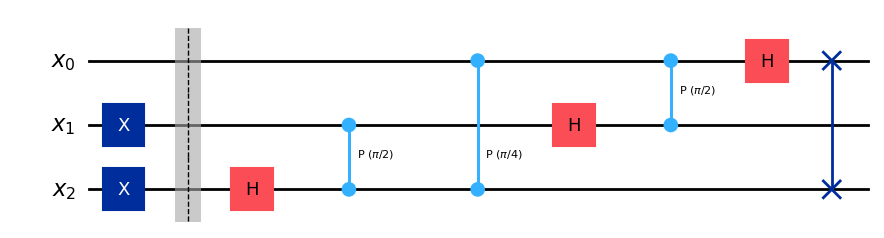

In [18]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 0b110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)
qc.swap(0,2) # 큐비트 순서를 역순으로 바꾸기
qc.draw(output='mpl')

In [19]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

### 6.2.4 QFT 클래스와 역 푸리에 변환

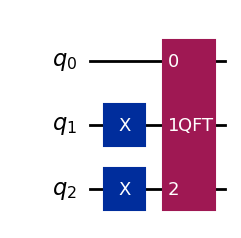

In [20]:
from qiskit.circuit.library import QFT

# 3 qubit 양자 회로를 초기화한다.
qc = QuantumCircuit(3)

# 입력상태를 0b110 로 초기화한다.
qc.x([1,2])
qft_c = QFT(3)
qc.compose(qft_c, range(3), inplace=True)

qc.draw(output='mpl')

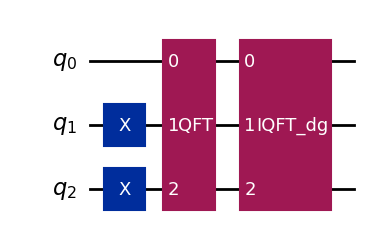

In [21]:
from qiskit.circuit.library import QFT

# 3 qubit 양자 회로를 초기화한다.
qc = QuantumCircuit(3)

# 입력상태를 0b110 로 초기화한다.
qc.x([1,2])

qc.compose(QFT(3), range(3), inplace=True)
qc.compose(QFT(3, inverse=True), range(3), inplace=True)
qc.draw(output='mpl')

어떤 양자 상태에 QFT를 적용하여 그 QFT 출력 상태에 대해 다시 IQFT를 적용하면 원래 상태가 복원되어야 한다.
이를 |110> 에 대해 확인해보자. 양자 회로를 시뮬레이터에 넣어서 실행하면 100%의 확률로 측정값 110이 측정된다.

In [22]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'110': 1000}


## 6.3 양자 위상 추정 Quantum Phase Estimation